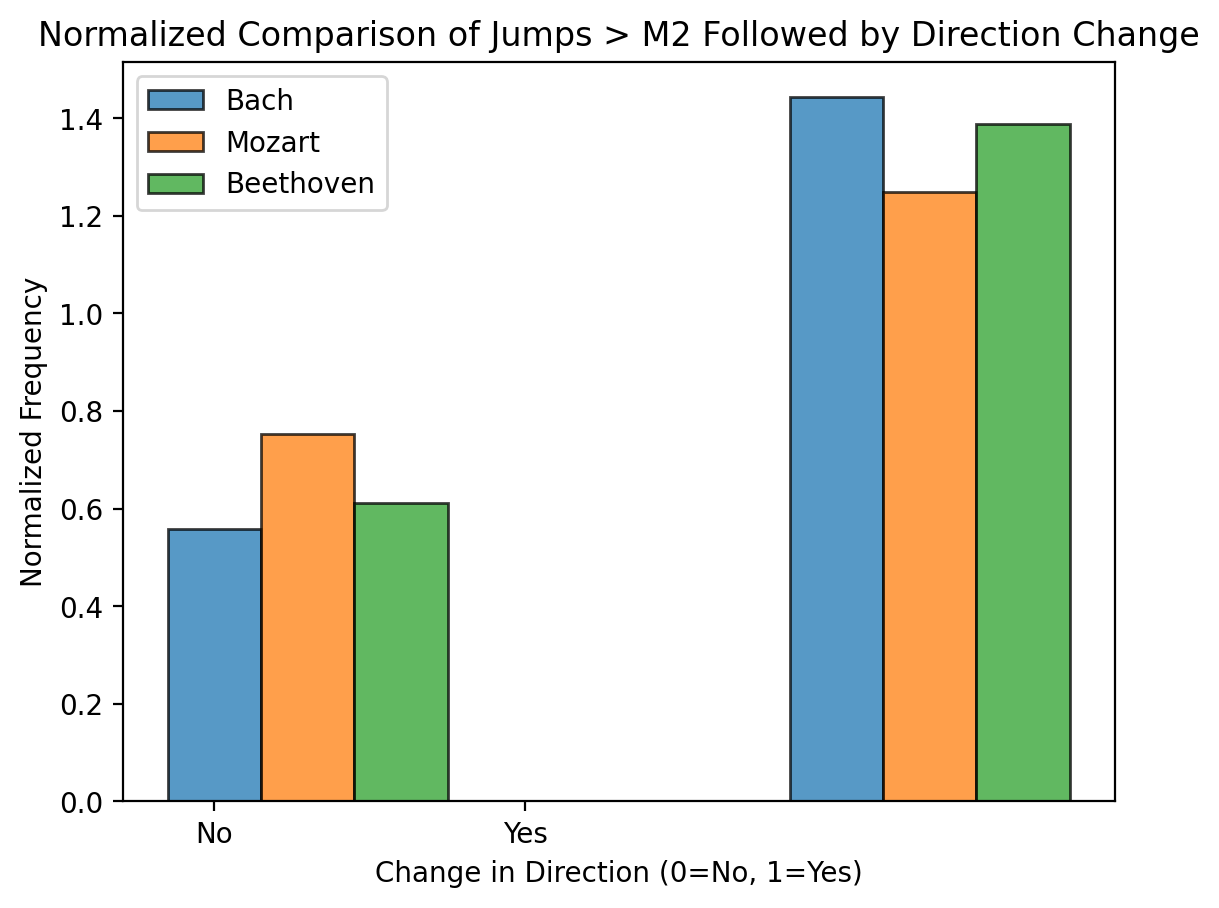

In [3]:
from music21 import corpus, interval, note, chord
import matplotlib.pyplot as plt
import numpy as np

def analyze_composer(composer_name):
    jump_followed_by_change_counts = []
    piece_counter = 0
    for piece_name in corpus.getComposer(composer_name):
        if piece_counter >= 10:
            break
        try:
            score = corpus.parse(piece_name)
            for part in score.parts:
                part_notes = list(part.flat.notesAndRests)
                for i in range(len(part_notes) - 2):
                    current_obj = part_notes[i]
                    next_obj = part_notes[i + 1]
                    following_obj = part_notes[i + 2]

                    if not (isinstance(current_obj, (note.Note, chord.Chord)) and isinstance(next_obj, (note.Note, chord.Chord)) and isinstance(following_obj, (note.Note, chord.Chord))):
                        continue

                    current_note = current_obj.pitch if isinstance(current_obj, note.Note) else current_obj.sortAscending()[-1].pitch
                    next_note = next_obj.pitch if isinstance(next_obj, note.Note) else next_obj.sortAscending()[-1].pitch
                    following_note = following_obj.pitch if isinstance(following_obj, note.Note) else following_obj.sortAscending()[-1].pitch

                    interval_between_notes = interval.Interval(current_note, next_note)
                    interval_to_following_note = interval.Interval(next_note, following_note)
                    direction_to_next_note = "up" if interval_between_notes.semitones > 0 else "down"
                    direction_to_following_note = "up" if interval_to_following_note.semitones > 0 else "down"

                    if abs(interval_between_notes.semitones) > 2:
                        if direction_to_next_note!= direction_to_following_note:
                            jump_followed_by_change_counts.append(1)
                        else:
                            jump_followed_by_change_counts.append(0)
            piece_counter += 1
        except Exception as e:
            print(f"Error processing {piece_name}: {e}")
    return jump_followed_by_change_counts

bach_data = analyze_composer('bach')
mozart_data = analyze_composer('mozart')
beethoven_data = analyze_composer('beethoven')

bach_normalized = np.histogram(bach_data, bins=[0, 0.5, 1, 1.5], density=True)
mozart_normalized = np.histogram(mozart_data, bins=[0, 0.5, 1, 1.5], density=True)
beethoven_normalized = np.histogram(beethoven_data, bins=[0, 0.5, 1, 1.5], density=True)

bins = np.array([0, 0.5, 1, 1.5])
width = 0.15

positions_bach = bins[:-1] + width
positions_mozart = bins[:-1] + 2 * width
positions_beethoven = bins[:-1] + 3 * width
# Adjusted tick_positions to match the number of labels
tick_positions = [positions_bach[0], positions_bach[1]]

plt.bar(positions_bach, bach_normalized[0], width, edgecolor='black', label='Bach', alpha=0.75)
plt.bar(positions_mozart, mozart_normalized[0], width, edgecolor='black', label='Mozart', alpha=0.75)
plt.bar(positions_beethoven, beethoven_normalized[0], width, edgecolor='black', label='Beethoven', alpha=0.75)

plt.title('Normalized Comparison of Jumps > M2 Followed by Direction Change')
plt.xlabel('Change in Direction (0=No, 1=Yes)')
plt.ylabel('Normalized Frequency')
plt.xticks(tick_positions, ['No', 'Yes'])  # Now correctly matches the number of labels to tick positions
plt.legend()
plt.show()